In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [ ]:
tennis_data = pd.read_csv('../data/playtennis.csv')
tennis_data

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)
tennis_data

In [ ]:
tennis_data.Temperature.replace('Hot', 1, inplace = True)
tennis_data.Temperature.replace('Mild', 2, inplace = True)
tennis_data.Temperature.replace('Cool', 3, inplace = True)
tennis_data.Humidity.replace('High', 1, inplace=True)
tennis_data.Humidity.replace('Normal', 2, inplace=True)
tennis_data.Wind.replace('Weak', 1, inplace=True)
tennis_data.Wind.replace('Strong', 2, inplace=True)
tennis_data.PlayTennis.replace('No', 1, inplace=True)
tennis_data.PlayTennis.replace('Yes', 2, inplace=True)

In [ ]:
tennis_data

In [ ]:
# 데이터프레임.loc[index, column_index]
# : -> 모든줄
# Outlook : Wind -> 'Outlook' ~ 'Wind'까지의 데이터 전부
X = tennis_data.loc[ : , 'Outlook': 'Wind']
y = tennis_data.PlayTennis
X, y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [81]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, dt_prediction)

In [83]:
print(accuracy)

0.75


In [116]:
dt_dot_data = tree.export_graphviz(
					dt_clf,
					feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],
					class_names=['No', 'Yes'],
					filled=True,
					rounded=True,
					special_characters=True)

# 아래처럼 값을 뽑아올 수 있음.
# 원본을 변형시키지 않았을 때 대분류 2개를 넣을 수 있음.
# dt_dot_data = tree.export_graphviz(
# 					dt_clf,
# 					feature_names=tennis_data.columns[0:4],
# 					class_names=tennis_data.PlayTennis.unique(),
# 					filled=True,
# 					rounded=True,
# 					special_characters=True)

In [117]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

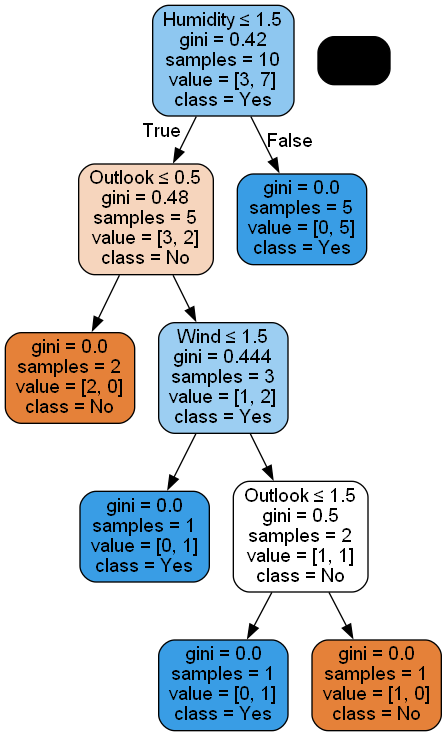

In [118]:
Image(dt_graph.create_png())